In [40]:
inputSize1 = [350, 175, 7, 11]
inputSize2 = [8.28, 5.27, 0.25, 0.4]

class HSection:
    def __init__(self, section):
        self.size = section
    
section1 = HSection(inputSize1)
section2 = HSection(inputSize2)
section1.size

[350, 175, 7, 11]

In [ ]:
class Section_property:
    def __init__(self, section): ##rough, detail
        self.d = section.size[0]
        self.bf = section.size[1]
        self.tw = section.size[2]
        self.tf = section.size[3]

In [53]:
    def find_Ag(self, secProp):
        d = self.d
        bf = self.bf
        tw = self.tw
        tf = self.tf
        return 2*tf*bf + (d-2*tf)*tw

    def find_An(self, db, boltN, gap): ## 볼트 직경을 인수로 전달
        An = self.find_Ag() - boltN*(db + gap)*self.tf
        return An
    
    def find_U(self, l, boltN):
        d = self.d
        bf = self.bf
        tw = self.tw
        tf = self.tf
        Ag = self.find_Ag()
        
        x = (bf*tf*tf/2 + (d/2 - tf)*tw*((d/2-tf)/2 + tf)) / (bf*tf + (d/2 - tf)*tw)
        u1 = (2*bf*tf) / Ag
        u2 = 1 - (x/l)
        
        if boltN >= 3:
            if bf < 2/3*d:
                u3 = 0.85
            else:
                u3 = 0.9
        else:
            u3 = 0
        
        return max(u1, u2, u3)
    
    def calc_Ae(self, db, l, boltN, gap):
        U =  self.find_U(l, boltN)
        return self.find_An(db, boltN, gap) * U

    
    def tensilecheck(self, Fy, Fu, mode):
        if mode == "rough":
            Φ1 = 0.9
            Φ2 = 0.75
            self.Fy = Fy
            self.Fu = Fu
            Ag = section_property1.find_Ag()
            Ae = 0.75 * section_property1.find_Ag()
            result = round(min(Φ1*Fy*Ag, Φ2*Fu*Ae),2)
            return result
        elif mode == "detail":
            pass

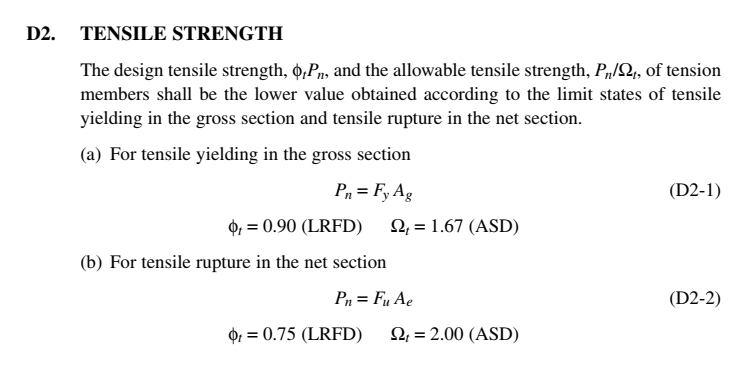

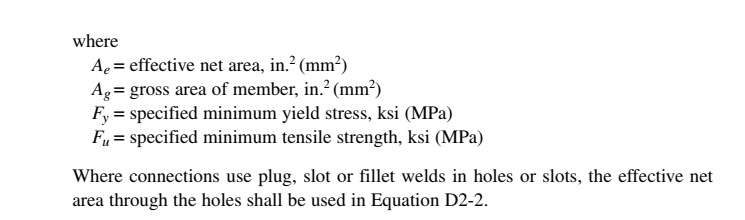

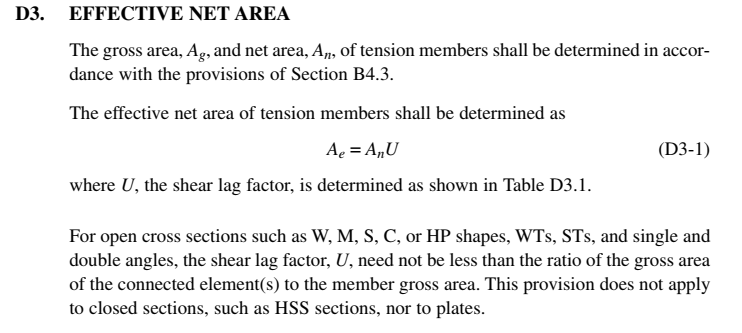

In [42]:
section_property1 = Section_property(section1)
section_property2 = Section_property(section2)
section_property1

In [43]:
section_property2.find_Ag()

6.086

In [44]:
section_property1.find_An(20, 4, 2)

5178

In [45]:
section_property2.find_U(9, 4)

0.9071073867163253

In [46]:
section_property1.calc_Ae(20, 228, 4, 2)

4401.3

In [47]:
section_property2.calc_Ae(13/16, 9, 4, 1/16)

4.2507052141527

In [48]:
section_property1.find_An(20, 4, 2)

5178

In [49]:
class DesignBase:
        
    def tensilecheck(self, Fy, Fu):
        Φ1 = 0.9
        Φ2 = 0.75
        self.Fy = Fy
        self.Fu = Fu
        Ag = section_property1.find_Ag()
        Ae = 0.75 * section_property1.find_Ag()
        result = round(min(Φ1*Fy*Ag, Φ2*Fu*Ae),2)
        return result

In [50]:
designbase = DesignBase()

In [51]:
designbase.tensilecheck(275/1000, 400/1000)

1382.85

코드부분 삽입해서 문서 형식 만들어두기

만들어둔 함수로 예제 풀어보기(단위환산 버전 - Sun > mk, js 예제풀이 주피터 작성)